In [1]:
from urllib.request import urlopen
import numpy as np
linkin = "http://work.caltech.edu/data/in.dta"

linkout="http://work.caltech.edu/data/out.dta"

f = urlopen(linkin)

def getline(line):
    q=line.rstrip()
    q=q.decode()
    q=q.split()
    qq=[float(i) for i in q]
    return(qq)
stop=0
lpts=[]
louts=[]
vouts=[]
vpts=[]
inerrs=[]
valerrs=[]
for i in range(25):
    myline = f.readline()
    a=getline(myline)
    lpts.append([a[0],a[1]])
    louts.append(a[2])
for i in range(10):
    myline = f.readline()
    a=getline(myline)
    vpts.append([a[0],a[1]])
    vouts.append(a[2])    
    
# OUT data:
f = urlopen(linkout)

stop=0
tpts=[]
touts=[]
terrs=[]
while not(stop):
    myline = f.readline()
    if len(myline)<1:
        stop=1
    else:
        a=getline(myline)
        tpts.append([a[0],a[1]])
        touts.append(a[2])
newtpts=[[1,x,y,x**2,y**2,x*y,abs(x-y),abs(y+x)] for x,y in tpts] 
newpoints=[[1,x,y,x**2,y**2,x*y,abs(x-y),abs(y+x)] for x,y in lpts] 
newvpts=[[1,x,y,x**2,y**2,x*y,abs(x-y),abs(y+x)] for x,y in vpts] 
for k in [3,4,5,6,7]:
    nlpts=[x[0:k+1] for x in newpoints]
    
    X=np.matrix(nlpts)
    Xpinv=np.linalg.pinv(X)
    Z=np.inner( Xpinv,louts)
    W=np.array(Z)
    outsnew=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(outsnew[i]>0) for i in range(len(outsnew))]
    compare=[]
    compare=[booli[i]==louts[i] for i in range (len(louts))]
    inerr=1-(np.array(compare).sum()/len(compare))
    inerrs.append(inerr)
    # val ERROR:
    nvpts=[x[0:k+1] for x in newvpts]
    X=np.matrix(nvpts)
    outsnew=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(outsnew[i]>0) for i in range(len(outsnew))]
    compare=[]
    compare=[booli[i]==vouts[i] for i in range (len(vouts))]
    valerr=1-(np.array(compare).sum()/len(compare))
    valerrs.append(valerr)   
    # Test error:
    ntpts=[x[0:k+1] for x in newtpts]
    X=np.matrix(ntpts)
    outsnew=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(outsnew[i]>0) for i in range(len(outsnew))]
    compare=[]
    compare=[booli[i]==touts[i] for i in range (len(touts))]
    terr=1-(np.array(compare).sum()/len(compare))
    terrs.append(terr)   

In [1]:
from urllib.request import urlopen
import numpy as np
linkin = "http://work.caltech.edu/data/in.dta"

linkout="http://work.caltech.edu/data/out.dta"

f = urlopen(linkin)

def getline(line):
    q=line.rstrip()
    q=q.decode()
    q=q.split()
    qq=[float(i) for i in q]
    return(qq)
stop=0
lpts=[]
louts=[]
vouts=[]
vpts=[]
inerrs=[]
valerrs=[]
for i in range(25):
    myline = f.readline()
    a=getline(myline)
    vpts.append([a[0],a[1]])
    vouts.append(a[2])
for i in range(10):
    myline = f.readline()
    a=getline(myline)
    lpts.append([a[0],a[1]])
    louts.append(a[2])    
    
# OUT data:
f = urlopen(linkout)

stop=0
tpts=[]
touts=[]
terrs=[]
while not(stop):
    myline = f.readline()
    if len(myline)<1:
        stop=1
    else:
        a=getline(myline)
        tpts.append([a[0],a[1]])
        touts.append(a[2])
newtpts=[[1,x,y,x**2,y**2,x*y,abs(x-y),abs(y+x)] for x,y in tpts] 
newpoints=[[1,x,y,x**2,y**2,x*y,abs(x-y),abs(y+x)] for x,y in lpts] 
newvpts=[[1,x,y,x**2,y**2,x*y,abs(x-y),abs(y+x)] for x,y in vpts] 
for k in [3,4,5,6,7]:
    nlpts=[x[0:k+1] for x in newpoints]
    
    X=np.matrix(nlpts)
    Xpinv=np.linalg.pinv(X)
    Z=np.inner( Xpinv,louts)
    W=np.array(Z)
    outsnew=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(outsnew[i]>0) for i in range(len(outsnew))]
    compare=[]
    compare=[booli[i]==louts[i] for i in range (len(louts))]
    inerr=1-(np.array(compare).sum()/len(compare))
    inerrs.append(inerr)
    # val ERROR:
    nvpts=[x[0:k+1] for x in newvpts]
    X=np.matrix(nvpts)
    outsnew=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(outsnew[i]>0) for i in range(len(outsnew))]
    compare=[]
    compare=[booli[i]==vouts[i] for i in range (len(vouts))]
    valerr=1-(np.array(compare).sum()/len(compare))
    valerrs.append(valerr)   
    # Test error:
    ntpts=[x[0:k+1] for x in newtpts]
    X=np.matrix(ntpts)
    outsnew=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(outsnew[i]>0) for i in range(len(outsnew))]
    compare=[]
    compare=[booli[i]==touts[i] for i in range (len(touts))]
    terr=1-(np.array(compare).sum()/len(compare))
    terrs.append(terr)   

In [2]:
import random as rn
import numpy as np
mins=[]
for i in range(100000):
    a,b=rn.random(),rn.random()
    mins.append(min(a,b))
mins1=np.array(mins)
np.average(mins1)

0.33427213550229062

In [66]:
import numpy as np

aerrsc=[]
aerrsl=[]
for ro in np.arange(0.005,15,.1):
#for ro in [8]:
    pts=np.array([[-1,0],[ro,1],[1,0]])
    errsc=[]
    errsl=[]
    bs=[]
    for i in range(len(pts)):
        tpt=pts[i]
        inds=np.setdiff1d([0,1,2],i)
        newpoints=pts[inds]
        bb=np.average([newpoints[0,1],newpoints[1,1]])
        bs.append(bb)
        errsc.append((tpt[1]-bb)**2)

        m=(newpoints[1,1]-newpoints[0,1])/(newpoints[1,0]-newpoints[0,0])
        b=newpoints[0,1]-(m*newpoints[0,0])
        y=m*tpt[0]+b
        errsl.append((tpt[1]-y)**2)
        
    aerrsc.append(np.average(errsc))
    aerrsl.append(np.average(errsl))

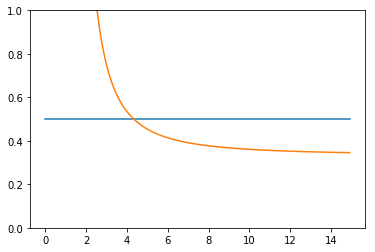

4.3356613072439956

In [69]:
import matplotlib.pyplot as plt
t=np.arange(0.005,15,.1)
plt.plot(t,aerrsc)

plt.plot(t,aerrsl)
plt.ylim(0,1)
plt.show()
np.sqrt((9+4*np.sqrt(6)))

In [2]:
from sklearn import svm
import random as rn
import matplotlib.pyplot as plt

def targetf(x,y):
        if y>m*x+b:
            return 1
        else: 
            return -1
toplot=0 
Nvecs=[]
pla_b=[]
svm_b=[]
for k in range(1000):        
    q=rn.Random()  
    x1,y1 =q.random()*2-1 ,q.random()*2-1
    x2,y2 =q.random()*2-1 ,q.random()*2-1
    m=(y2-y1)/(x2-x1)
    b=y2-(m*x2)
    xx1,yy1=-1,m*-1+b
    xx2,yy2=1,m*1+b
    npts=100
    go=1
    while go:
        points=[[rn.random()*2-1,rn.random()*2-1] for x in range(npts) ]
        outputs=[targetf(x,y) for x,y in points]
        q=np.array(outputs)
        if (sum(q==1)==0 or sum(q==1)==npts):
            go=1
        else:
            go=0
    if toplot:
        plt.close()   
        plt.figure()
        plt.subplot(1,2,1)
        for i in range(len(points)):
            y=outputs[i]
            if y>0:
                plt.scatter(points[i][0],points[i][1],marker='o')
            else:
                plt.scatter(points[i][0],points[i][1],marker='x')
        plt.plot([xx1,xx2],[yy1,yy2])
        plt.ylim([-1,1])
        plt.show()


    W=[0,0,0]
    ppoints=[[1,x,y] for x,y in points] 
    go=1
    cnt=0
    while go:
        ind=rn.randint(0,len(ppoints)-1)
        y=np.sign(np.dot(W,ppoints[ind]))
        if y==outputs[ind]:
            cnt+=1
            pass
        else:
            W=W+np.multiply(ppoints[ind],outputs[ind])
            cnt=0
        if cnt>npts*5:
            go=0
    if toplot:
        plt.subplot(1,2,2)        
        for i in range(len(points)):
            y=outputs[i]
            y=np.sign(np.dot(W,ppoints[i]))
            if y>0:
                plt.scatter(points[i][0],points[i][1],marker='o')
            else:
                plt.scatter(points[i][0],points[i][1],marker='x')
        plt.show()

    svc = svm.SVC(kernel='linear',C=10**14)
    svc.fit(points, outputs) 

    N1=10000
    newpts=[[rn.random()*2-1,rn.random()*2-1] for i in range(N1)]
    ya1=[targetf(pt[0],pt[1]) for pt in newpts]
    yp=svc.predict(newpts) 
    Nvecs.append(len(svc.support_vectors_))
    SV_badscnt=0
    badscnt=0

    SV_badscnt=sum(ya1!=yp)

    for i in range(N1):
        pt=[1,newpts[i][0],newpts[i][1]]
        ya1=targetf(pt[1],pt[2])
        ya2=np.sign(np.dot(W,pt))
        if not(ya1==ya2):
            badscnt+=1


#     print(badscnt/N1)
#     print(SV_badscnt/N1)
    pla_b.append(badscnt/N1)
    svm_b.append(SV_badscnt/N1)
    



# badscnt=0
# aa=[]
# bb=[]
# N1=100000

#     aa.append(ya1)
    
#     bb.append(ya2)
#     if not(ya1==ya2):
#         badscnt+=1
# print(badscnt/N1)


ImportError: No module named 'sklearn'

In [63]:
isgreater= [pla_b[i]>svm_b[i] for i in range(len(svm_b))]
np.average(isgreater)
np.average(Nvecs)

2.9990000000000001

In [60]:
len(isgreater)

1000

In [6]:

from sklearn import svm

svc = svm.SVC(kernel='linear',C=10**14)
svc.fit(points, outputs) 


badscnt=0
aa=[]
bb=[]
N1=100000

newpts=[[rn.random()*2-1,rn.random()*2-1] for i in range(N1)]
ya1=[targetf(pt[0],pt[1]) for pt in newpts]
yp=svc.predict(newpts) 


badscnt=ya1!=yp
print(sum(badscnt)/N1)



# SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)

# def cvxopt_solve_qp(P, q, G=None, h=None, A=None, b=None):
#     P = .5 * (P + P.T)  # make sure P is symmetric
#     args = [matrix(P), matrix(q)]
#     if G is not None:
#         args.extend([matrix(G), matrix(h)])
#         if A is not None:
#             args.extend([matrix(A), matrix(b)])
#     sol = cvxopt.solvers.qp(*args)
#     if 'optimal' not in sol['status']:
#         return None
#     return numpy.array(sol['x']).reshape((P.shape[1],))
# P=mat
# q=np.ones(len(outputs))*-1
# A=outputs
# B=0
# alphas=cvxopt_solve_qp(P, q, [],[], A, B)

ImportError: No module named 'sklearn'

In [182]:
# THIS TIME WITH REALLY SOLVING FOR THE SUPPORT VECTORS!
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import matrix
from cvxopt import solvers
def targetf(x,y):
        if y>m*x+b:
            return 1
        else: 
            return -1
toplot=0
Nvecs=[]
pla_b=[]
svm_b=[]
for k in range(1000):        
    q=rn.Random()  
    x1,y1 =q.random()*2-1 ,q.random()*2-1
    x2,y2 =q.random()*2-1 ,q.random()*2-1
    m=(y2-y1)/(x2-x1)
    b=y2-(m*x2)
    xx1,yy1=-1,m*-1+b
    xx2,yy2=1,m*1+b
    npts=100
    go=1
    while go:
        points=[[rn.random()*2-1,rn.random()*2-1] for x in range(npts) ]
        outputs=[targetf(x,y) for x,y in points]
        q=np.array(outputs)
        if (sum(q==1)==0 or sum(q==1)==npts):
            go=1
        else:
            go=0
    if toplot:
        plt.close()   
        plt.figure()
        plt.subplot(1,2,1)
        for i in range(len(points)):
            y=outputs[i]
            if y>0:
                plt.scatter(points[i][0],points[i][1],marker='o')
            else:
                plt.scatter(points[i][0],points[i][1],marker='x')
        plt.plot([xx1,xx2],[yy1,yy2])
        plt.ylim([-1,1])
        plt.show()


    W=[0,0,0]
    ppoints=[[1,x,y] for x,y in points] 
    go=1
    cnt=0
    while go:
        ind=rn.randint(0,len(ppoints)-1)
        y=np.sign(np.dot(W,ppoints[ind]))
        if y==outputs[ind]:
            cnt+=1
            pass
        else:
            W=W+np.multiply(ppoints[ind],outputs[ind])
            cnt=0
        if cnt>npts*5:
            go=0
    if toplot:
        plt.subplot(1,2,2)        
        for i in range(len(points)):
            y=outputs[i]
            y=np.sign(np.dot(W,ppoints[i]))
            if y>0:
                plt.scatter(points[i][0],points[i][1],marker='o')
            else:
                plt.scatter(points[i][0],points[i][1],marker='x')
        plt.show()

#     svc = svm.SVC(kernel='linear',C=10**14)
#     svc.fit(points, outputs) 

    N1=10000
    newpts=[[rn.random()*2-1,rn.random()*2-1] for i in range(N1)]
    ya1=[targetf(pt[0],pt[1]) for pt in newpts]
#     yp=svc.predict(newpts) 
#     Nvecs.append(len(svc.support_vectors_))
#     SV_badscnt=0
    badscnt=0

#     SV_badscnt=sum(ya1!=yp)

    for i in range(N1):
        pt=[1,newpts[i][0],newpts[i][1]]
        ya1=targetf(pt[1],pt[2])
        ya2=np.sign(np.dot(W,pt))
        if not(ya1==ya2):
            badscnt+=1


#     print(badscnt/N1)
#     print(SV_badscnt/N1)
    pla_b.append(badscnt/N1)
    
    



# badscnt=0
# aa=[]
# bb=[]
# N1=100000

#     aa.append(ya1)
    
#     bb.append(ya2)
#     if not(ya1==ya2):
#         badscnt+=1
# print(badscnt/N1)



    mat=np.eye(len(points))
    for i in range(len(points)):
        for j in range(len(points)):
            mat[i][j]=outputs[i]*outputs[j]*np.dot(points[i],points[j])
        
        
# def cvxopt_solve_qp(P, q, G=None, h=None, A=None, b=None):
# #     P = .5 * (P + P.T)  # make sure P is symmetric
#     args = [matrix(P,tc='d'), matrix(q,tc='d')]
#     if G is not None:
#         args.extend([matrix(G,tc='d'), matrix(h,tc='d')])
#         if A is not None:
#             args.extend([matrix(A,tc='d'), matrix(b,tc='d')])
#     sol = cvxopt.solvers.qp(*args)
#     if 'optimal' not in sol['status']:
#         return None
#     return np.array(sol['x']).reshape((P.shape[1],))
    P=matrix(mat)

    q=matrix(np.ones(len(outputs))*-1,tc='d')
    A=matrix(np.matrix(outputs),tc='d')
    # A=np.transpose(A)
    bb=matrix(0,tc='d')
    G=matrix(np.eye(len(points))*-1,tc='d')

    h=matrix(np.ones(len(outputs))*0)
    sol = solvers.qp(P,q,G,h,A,bb)
    # solution=cvxopt_solve_qp(P, q,G,h,A,b)
    a=sol['x']
    alphas=np.array(a)
    svs=[]
    svinds=[]
    WSVM=[0,0]
    for i in range(len(alphas)):
        if alphas[i]>.1:
            svs.append(points[i])
            WSVM=np.add(WSVM,np.multiply(points[i],outputs[i])*alphas[i])
            svinds.append(i)

    theb=(outputs[svinds[0]]*np.dot(WSVM,points[svinds[0]])-1)/-outputs[svinds[0]]
    svs
    # WSVM=[]
    # for i in range(len(svs)):
    #     WSVM=np.add(WSVM,)
#     newpts=[[rn.random()*2-1,rn.random()*2-1] for i in range(N1)]

    ya1=[targetf(pt[0],pt[1]) for pt in newpts]
    y12=[np.sign(np.dot(WSVM,pt)+theb) for pt in newpts]
    SV_badscnt=sum(np.array(ya1)!=np.array(y12))
    Nvecs.append(len(svinds))
    svm_b.append(SV_badscnt/N1)

     pcost       dcost       gap    pres   dres
 0: -3.1551e+01 -6.9371e+01  3e+02  2e+01  2e+00
 1: -7.5757e+01 -8.2755e+01  1e+02  7e+00  9e-01
 2: -1.3251e+02 -1.3354e+02  2e+02  7e+00  9e-01
 3: -3.2366e+02 -2.9577e+02  2e+02  6e+00  8e-01
 4: -3.2967e+02 -3.0379e+02  2e+02  5e+00  6e-01
 5: -2.3661e+02 -2.4488e+02  1e+02  1e+00  2e-01
 6: -2.0080e+02 -2.0201e+02  7e+00  6e-02  7e-03
 7: -1.9989e+02 -1.9990e+02  8e-02  7e-04  8e-05
 8: -1.9988e+02 -1.9988e+02  8e-04  7e-06  8e-07
 9: -1.9988e+02 -1.9988e+02  8e-06  7e-08  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1051e+01 -6.9460e+01  3e+02  2e+01  2e+00
 1: -8.9908e+01 -1.1136e+02  2e+02  9e+00  1e+00
 2: -1.8039e+02 -2.0470e+02  2e+02  8e+00  1e+00
 3: -9.2995e+02 -9.3142e+02  2e+02  7e+00  1e+00
 4: -2.9839e+03 -2.9602e+03  3e+02  7e+00  1e+00
 5: -1.6003e+03 -1.9726e+03  1e+03  7e+00  9e-01
 6: -4.5782e+03 -4.8546e+03  2e+03  5e+00  7e-01
 7: -3.8007e+03 -4.3987e+03  1e+03  1e+00  1e-0

     pcost       dcost       gap    pres   dres
 0: -3.2568e+01 -6.6487e+01  4e+02  2e+01  2e+00
 1: -7.2948e+01 -7.8390e+01  2e+02  9e+00  9e-01
 2: -1.4956e+02 -1.4739e+02  2e+02  9e+00  9e-01
 3: -7.7461e+02 -6.7148e+02  2e+02  8e+00  8e-01
 4: -2.7560e+02 -3.1178e+02  4e+02  5e+00  4e-01
 5: -2.9344e+02 -2.8928e+02  7e+01  6e-01  6e-02
 6: -2.5638e+02 -2.5673e+02  8e-01  4e-03  4e-04
 7: -2.5628e+02 -2.5629e+02  8e-03  4e-05  4e-06
 8: -2.5628e+02 -2.5628e+02  8e-05  4e-07  4e-08
 9: -2.5628e+02 -2.5628e+02  8e-07  4e-09  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5110e+01 -7.5996e+01  3e+02  1e+01  2e+00
 1: -9.3210e+01 -1.0266e+02  1e+02  7e+00  1e+00
 2: -1.5547e+02 -1.6435e+02  1e+02  7e+00  1e+00
 3: -8.0253e+02 -7.7573e+02  2e+02  7e+00  9e-01
 4: -9.1697e+02 -9.0079e+02  3e+02  6e+00  9e-01
 5: -1.1407e+03 -1.1667e+03  6e+02  6e+00  8e-01
 6: -1.1717e+03 -1.3756e+03  8e+02  3e+00  4e-01
 7: -9.0920e+02 -9.2752e+02  3e+01  6e-02  9e-0

     pcost       dcost       gap    pres   dres
 0: -3.6164e+01 -7.8541e+01  3e+02  2e+01  2e+00
 1: -1.0166e+02 -1.1003e+02  1e+02  8e+00  1e+00
 2: -2.0084e+02 -2.0809e+02  2e+02  8e+00  1e+00
 3: -9.0270e+02 -8.9423e+02  2e+02  7e+00  1e+00
 4: -1.0728e+03 -1.0645e+03  2e+02  7e+00  1e+00
 5: -1.6662e+03 -1.6606e+03  5e+02  7e+00  9e-01
 6: -1.7168e+03 -1.7411e+03  7e+02  7e+00  9e-01
 7: -1.8134e+03 -2.0073e+03  1e+03  5e+00  6e-01
 8: -1.5883e+03 -1.7459e+03  4e+02  7e-01  9e-02
 9: -1.5494e+03 -1.5703e+03  5e+01  9e-02  1e-02
10: -1.5565e+03 -1.5580e+03  3e+00  5e-03  6e-04
11: -1.5566e+03 -1.5567e+03  3e-02  5e-05  6e-06
12: -1.5566e+03 -1.5566e+03  3e-04  5e-07  6e-08
13: -1.5566e+03 -1.5566e+03  3e-06  5e-09  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1182e+01 -7.0787e+01  4e+02  2e+01  2e+00
 1: -8.6964e+01 -1.0201e+02  2e+02  8e+00  1e+00
 2: -1.9893e+02 -2.1139e+02  2e+02  8e+00  1e+00
 3: -7.4909e+02 -6.8862e+02  2e+02  7e+00  8e-0

 3: -7.3220e+02 -7.3143e+02  2e+02  6e+00  1e+00
 4: -1.6965e+03 -1.6827e+03  2e+02  6e+00  1e+00
 5: -2.3181e+03 -2.3155e+03  5e+02  6e+00  1e+00
 6: -2.2656e+03 -2.4263e+03  1e+03  6e+00  9e-01
 7: -2.8755e+03 -3.1782e+03  2e+03  4e+00  6e-01
 8: -2.1799e+03 -2.3602e+03  3e+02  1e-01  2e-02
 9: -2.2156e+03 -2.2174e+03  3e+00  1e-03  2e-04
10: -2.2160e+03 -2.2160e+03  3e-02  1e-05  2e-06
11: -2.2160e+03 -2.2160e+03  3e-04  1e-07  2e-08
12: -2.2160e+03 -2.2160e+03  3e-06  1e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3136e+01 -7.4596e+01  4e+02  2e+01  2e+00
 1: -8.4087e+01 -1.1126e+02  2e+02  9e+00  1e+00
 2: -2.3196e+02 -2.7120e+02  2e+02  9e+00  1e+00
 3: -1.4728e+03 -1.4750e+03  2e+02  8e+00  1e+00
 4: -4.7603e+03 -4.7245e+03  3e+02  8e+00  1e+00
 5: -6.3168e+03 -6.3439e+03  5e+02  8e+00  1e+00
 6: -7.6086e+03 -7.7870e+03  1e+03  8e+00  1e+00
 7: -1.1558e+04 -1.2760e+04  3e+03  7e+00  9e-01
 8: -1.9790e+04 -2.4597e+04  8e+03  6e+00  7e-

     pcost       dcost       gap    pres   dres
 0: -2.3484e+01 -5.3756e+01  3e+02  2e+01  2e+00
 1: -5.7189e+01 -7.0506e+01  2e+02  7e+00  1e+00
 2: -2.0289e+02 -1.8091e+02  1e+02  5e+00  7e-01
 3: -2.3756e+02 -2.1201e+02  1e+02  5e+00  7e-01
 4: -2.9579e+02 -2.7020e+02  2e+02  5e+00  7e-01
 5: -2.9305e+02 -2.8650e+02  2e+02  3e+00  4e-01
 6: -2.2375e+02 -2.3047e+02  3e+01  2e-01  3e-02
 7: -2.1935e+02 -2.1942e+02  3e-01  2e-03  3e-04
 8: -2.1931e+02 -2.1931e+02  3e-03  2e-05  3e-06
 9: -2.1931e+02 -2.1931e+02  3e-05  2e-07  3e-08
10: -2.1931e+02 -2.1931e+02  3e-07  2e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3370e+01 -7.0654e+01  4e+02  2e+01  2e+00
 1: -7.2836e+01 -9.0526e+01  2e+02  1e+01  1e+00
 2: -2.0882e+02 -2.2766e+02  2e+02  1e+01  1e+00
 3: -6.6717e+02 -6.8895e+02  2e+02  9e+00  1e+00
 4: -3.0873e+03 -3.0645e+03  4e+02  9e+00  1e+00
 5:  4.5299e+02 -9.0632e+02  3e+03  6e+00  7e-01
 6:  3.0804e+02 -1.0511e+03  3e+03  6e+00  6e-0

 9: -4.2614e+02 -4.2614e+02  1e-05  8e-14  6e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.0986e+01 -6.4942e+01  4e+02  2e+01  2e+00
 1: -8.9998e+01 -1.0030e+02  2e+02  1e+01  1e+00
 2: -1.6773e+02 -1.7573e+02  2e+02  1e+01  1e+00
 3: -8.4272e+02 -8.2990e+02  2e+02  1e+01  1e+00
 4: -1.4842e+03 -1.4561e+03  3e+02  1e+01  1e+00
 5: -1.7189e+03 -1.7678e+03  7e+02  9e+00  9e-01
 6: -2.2435e+03 -2.5108e+03  1e+03  6e+00  6e-01
 7: -1.7066e+03 -1.8654e+03  3e+02  6e-01  6e-02
 8: -1.6885e+03 -1.6901e+03  3e+00  6e-03  6e-04
 9: -1.6883e+03 -1.6883e+03  3e-02  6e-05  6e-06
10: -1.6883e+03 -1.6883e+03  3e-04  6e-07  6e-08
11: -1.6883e+03 -1.6883e+03  3e-06  6e-09  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5430e+01 -7.4318e+01  3e+02  2e+01  2e+00
 1: -9.0899e+01 -1.0482e+02  2e+02  8e+00  1e+00
 2: -2.3143e+02 -2.3054e+02  2e+02  7e+00  9e-01
 3: -7.1708e+02 -6.8542e+02  2e+02  7e+00  9e-01
 4: -8.6569e+02 -8.3217

     pcost       dcost       gap    pres   dres
 0: -2.8952e+01 -6.2912e+01  3e+02  2e+01  2e+00
 1: -6.5004e+01 -8.2536e+01  2e+02  8e+00  1e+00
 2: -1.5534e+02 -1.6816e+02  2e+02  8e+00  9e-01
 3: -5.6373e+02 -5.5347e+02  2e+02  7e+00  9e-01
 4: -8.1662e+02 -8.1067e+02  4e+02  7e+00  8e-01
 5: -7.5740e+02 -8.4999e+02  5e+02  4e+00  5e-01
 6: -6.4604e+02 -6.7405e+02  9e+01  4e-01  5e-02
 7: -6.2675e+02 -6.2706e+02  9e-01  4e-03  5e-04
 8: -6.2657e+02 -6.2658e+02  9e-03  4e-05  5e-06
 9: -6.2657e+02 -6.2657e+02  9e-05  4e-07  5e-08
10: -6.2657e+02 -6.2657e+02  9e-07  4e-09  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.7711e+01 -6.2005e+01  3e+02  2e+01  2e+00
 1: -6.3448e+01 -8.3980e+01  2e+02  9e+00  1e+00
 2: -1.6464e+02 -1.8998e+02  2e+02  9e+00  1e+00
 3: -1.0066e+03 -1.0257e+03  2e+02  8e+00  1e+00
 4: -1.4105e+03 -1.4311e+03  2e+02  8e+00  1e+00
 5: -3.3865e+03 -3.4362e+03  5e+02  8e+00  1e+00
 6:  2.3706e+04 -2.7578e+04  5e+04  5e-12  4e-1

     pcost       dcost       gap    pres   dres
 0: -3.3908e+01 -7.0547e+01  3e+02  2e+01  2e+00
 1: -8.6090e+01 -9.8149e+01  2e+02  9e+00  1e+00
 2: -1.7963e+02 -1.9206e+02  2e+02  9e+00  1e+00
 3: -7.6213e+02 -7.7032e+02  2e+02  8e+00  1e+00
 4: -1.9044e+03 -1.9032e+03  3e+02  8e+00  1e+00
 5: -1.6397e+03 -1.7466e+03  8e+02  8e+00  9e-01
 6: -2.5079e+03 -2.7221e+03  1e+03  6e+00  7e-01
 7: -1.7934e+03 -2.1876e+03  4e+02  1e-01  1e-02
 8: -1.9535e+03 -1.9582e+03  5e+00  1e-03  1e-04
 9: -1.9559e+03 -1.9559e+03  5e-02  1e-05  1e-06
10: -1.9559e+03 -1.9559e+03  5e-04  1e-07  1e-08
11: -1.9559e+03 -1.9559e+03  5e-06  1e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3574e+01 -6.8977e+01  3e+02  2e+01  2e+00
 1: -6.5206e+01 -7.5944e+01  2e+02  9e+00  1e+00
 2: -1.7148e+02 -1.8050e+02  2e+02  9e+00  1e+00
 3: -1.1022e+03 -1.0253e+03  2e+02  8e+00  9e-01
 4: -9.1696e+02 -8.5142e+02  3e+02  8e+00  8e-01
 5: -8.0686e+02 -7.7761e+02  5e+02  7e+00  7e-0

In [183]:
isgreater= [pla_b[i]>svm_b[i] for i in range(len(svm_b))]
print(np.average(isgreater))
print(np.average(Nvecs))
ya1

0.65
3.0


[-1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -

In [175]:
svm_b

[0.53280000000000005,
 0.5655,
 0.6613,
 0.69179999999999997,
 0.56010000000000004,
 0.58479999999999999,
 0.1129,
 0.0545,
 0.0465,
 0.3458,
 0.13569999999999999,
 0.019599999999999999,
 0.78890000000000005,
 0.83799999999999997,
 0.2349,
 0.72050000000000003,
 0.38840000000000002,
 0.71340000000000003,
 0.047,
 0.3624,
 0.52629999999999999,
 0.040800000000000003,
 0.48870000000000002,
 0.23760000000000001,
 0.78169999999999995,
 0.71660000000000001,
 0.13550000000000001,
 0.16139999999999999,
 0.2167,
 0.25240000000000001,
 0.5343,
 0.3619,
 0.91180000000000005,
 0.85229999999999995,
 0.58709999999999996,
 0.49730000000000002,
 0.078700000000000006,
 0.059900000000000002,
 0.39439999999999997,
 0.33050000000000002,
 0.22289999999999999,
 0.47549999999999998,
 0.85860000000000003,
 0.22869999999999999,
 0.80679999999999996,
 0.52010000000000001,
 0.055300000000000002,
 0.39200000000000002,
 0.14530000000000001,
 0.045999999999999999,
 0.0269,
 0.57550000000000001,
 0.1961,
 0.0332,
 0

In [153]:

# SV_badscnt=sum(y12!=ya1)
len(ya1)
iseq[0:15]

[[-0.4146241905195127, 0.12800489159968897],
 [-0.3981967309447145, 0.36204180733715674],
 [-0.24496932406976613, -0.6550967967568615]]

In [144]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [185]:
outputs

[-1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1]